In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
train_df = pd.read_csv("train.csv")
train_update = pd.read_csv("train_updates_20220929.csv")
test_df = pd.read_csv("test.csv")

In [67]:
train_df.head()

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5


In [68]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31390 entries, 0 to 31389
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            31390 non-null  int64  
 1   protein_sequence  31390 non-null  object 
 2   pH                31104 non-null  float64
 3   data_source       28043 non-null  object 
 4   tm                31390 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [69]:
print(f"pH Missing Values: {train_df.pH.isnull().sum()}")

pH Missing Values: 286


In [70]:
train_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2434 entries, 0 to 2433
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            2434 non-null   int64  
 1   protein_sequence  25 non-null     object 
 2   pH                25 non-null     float64
 3   data_source       0 non-null      float64
 4   tm                25 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 95.2+ KB


In [71]:
updates = train_update[train_update["tm"].notnull()].copy()

In [72]:
updates.head()

,seq_id,protein_sequence,pH,data_source,tm
25,973,DTSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,7.0,NaN,48.4
28,986,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVTFQNRESVLPT...,7.0,NaN,48.4
29,988,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFANRESVLPT...,7.0,NaN,49.0
30,989,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFANRESVLPT...,5.5,NaN,55.6
33,1003,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESTLPT...,7.0,NaN,48.4


In [73]:
train_df.drop(updates["seq_id"].values, axis=0, inplace=True)

In [74]:
train = pd.concat([train_df, updates])

In [75]:
train.drop(["seq_id", "data_source"], axis=1, inplace=True)

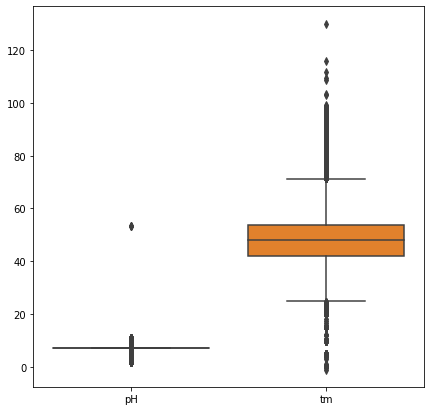

In [76]:
plt.figure(figsize=(7, 7))
sns.boxplot(data=train)
plt.show()

### Filling pH missing values with the median

In [77]:
ph_median = train["pH"].median()

In [78]:
train["pH"].fillna(ph_median, inplace=True)

In [79]:
train.isnull().sum()

protein_sequence    0
pH                  0
tm                  0
dtype: int64

In [80]:
train.corr()

,pH,tm
pH,1.000000,0.036883
tm,0.036883,1.000000


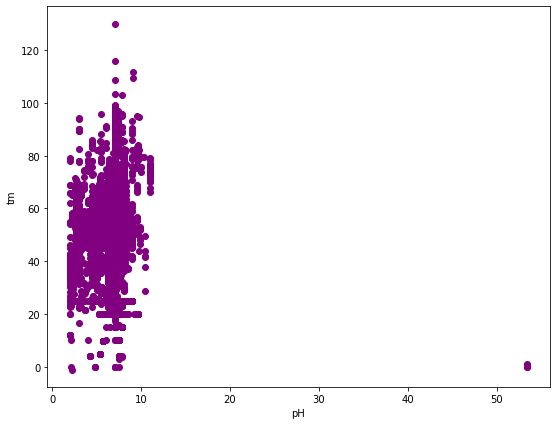

In [81]:
plt.figure(figsize=(9,7))
plt.scatter(x=train["pH"], y=train["tm"], c="purple")
plt.xlabel("pH")
plt.ylabel("tm")
plt.show()

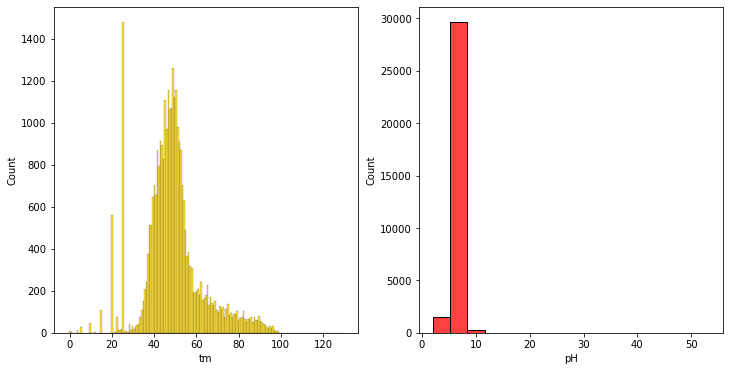

In [82]:
plt.figure(figsize=(12,6))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
sns.histplot(train["tm"], color="gold", ax=ax1)
sns.histplot(train["pH"], color="red", ax=ax2)
ax1.set_xlabel("tm")
ax2.set_xlabel("pH")
plt.show()

### Feature Engineering

In [83]:
protein_seq = train["protein_sequence"].values

In [84]:
import string

alph = list(string.ascii_uppercase)

In [85]:
protein_alph = pd.DataFrame(columns=alph, index=range(train.shape[0])).fillna(0)
protein_alph.head()

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
protein_alph.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype='object')

In [87]:
###############

In [88]:
# Creating new features by counting the times a letter appears in a protein sequence
def protein_instances(train, protein_seq, protein_alph):
    for i in range(protein_alph.shape[0]): #31390
        for ind, letter in enumerate(protein_alph.columns): #alphabet
            for a in protein_seq[i]:
                if a == letter:
                    protein_alph.iloc[i, ind] += 1
                else:
                    pass

In [89]:
protein_instances(train, protein_seq, protein_alph)

In [90]:
protein_alph.head()

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
0,45,0,1,13,30,13,38,3,14,0,...,6,25,11,14,0,37,4,0,3,0
1,28,0,0,10,52,6,18,4,13,0,...,22,30,14,12,0,13,3,0,3,0
2,50,0,9,27,32,21,65,11,16,0,...,25,31,33,30,0,30,3,0,16,0
3,20,0,5,19,29,12,16,7,10,0,...,9,10,16,19,0,14,3,0,4,0
4,86,0,14,78,78,32,84,40,71,0,...,54,63,148,120,0,124,16,0,47,0


In [91]:
protein_alph.to_csv("protein_alph.csv", index=False)